In [1]:
from oqtant.util.auth import get_user_token
from oqtant.schemas.quantum_matter import QuantumMatterFactory, QuantumMatter

In [14]:
qmf = QuantumMatterFactory()
qmf.get_login()

Auth(children=(HBox(children=(Image(value=b'\x89PNG\r\n\x1a\n\x00\x00\x00\rIHDR\x00\x00\x02\x12\x00\x00\x00\xc…

In [15]:
qmf.get_client()

Job Limits:
╒══════════════╤═══════════════════╤═══════════════╤═══════════════════════╕
│   Daily Used │   Daily Remaining │   Daily Limit │   Purchased Remaining │
╞══════════════╪═══════════════════╪═══════════════╪═══════════════════════╡
│            0 │               100 │           100 │                   110 │
╘══════════════╧═══════════════════╧═══════════════╧═══════════════════════╛


In [24]:
job_id = qmf.search_jobs(name="Shape Inversion (baseline)")[0]["external_id"]
matter = qmf.load_matter_from_job_id(job_id)
matter.get_result()

In [76]:
arr = matter.output.get_image_data()
ny, nx = arr.shape
x = np.linspace(-nx//2, nx//2, nx)
y = np.linspace(-ny//2, ny//2, ny)

In [41]:
import matplotlib.pyplot as plt
import numpy as np
import scipy.optimize as opt

In [104]:
def Gaussian2D(x, y, amplitude, x0, y0, sigma_x, sigma_y):    
    return amplitude*np.exp(-((x - x0)**2/(2 * sigma_x**2) + (y - y0)**2/(2 * sigma_y**2)))

def ThomasFermi2D(x, y, amplitude, x0, y0, w_x, w_y):
    return amplitude * np.power(np.maximum(0, 1 - (x - x0)**2/w_x**2 - (y - y0)**2/w_y**2), 3/2)

def BiModal2D(xy, Ac, At, x0, y0, sigma_x, sigma_y, w_x, w_y, offset):
    x, y = xy
    return (Gaussian2D(x, y, At, x0, y0, sigma_x, sigma_y) + ThomasFermi2D(x, y, Ac, x0, y0, w_x, w_y) + offset).ravel()

In [114]:
Y, X = np.meshgrid(x, y)
popt, pcov = opt.curve_fit(BiModal2D, (X, Y), arr.ravel(), p0 = (100., 100., 0., 0., 50., 50., 50., 50., 10.))
fit_arr = BiModal2D((X, Y), *popt).reshape(X.shape)

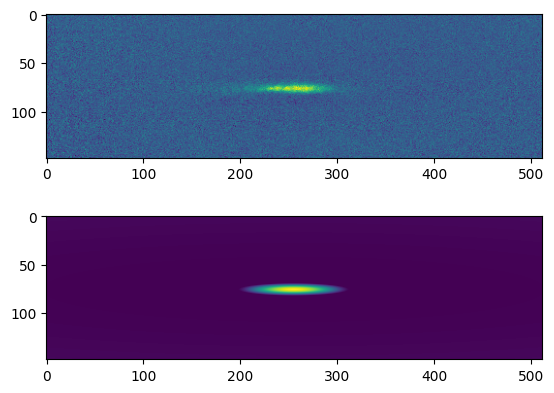

In [115]:
fig, axes = plt.subplots(2, 1)
axes[0].imshow(arr)
axes[1].imshow(fit_arr)